In [11]:
# Importing the libraries for use

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Dataset Column Names Definition and the URL for importing it

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
col_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

In [ ]:
# Reading from the dataset

df = pd.read_csv(dataset_url, delim_whitespace=True, header=None, names=col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Checking for null values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

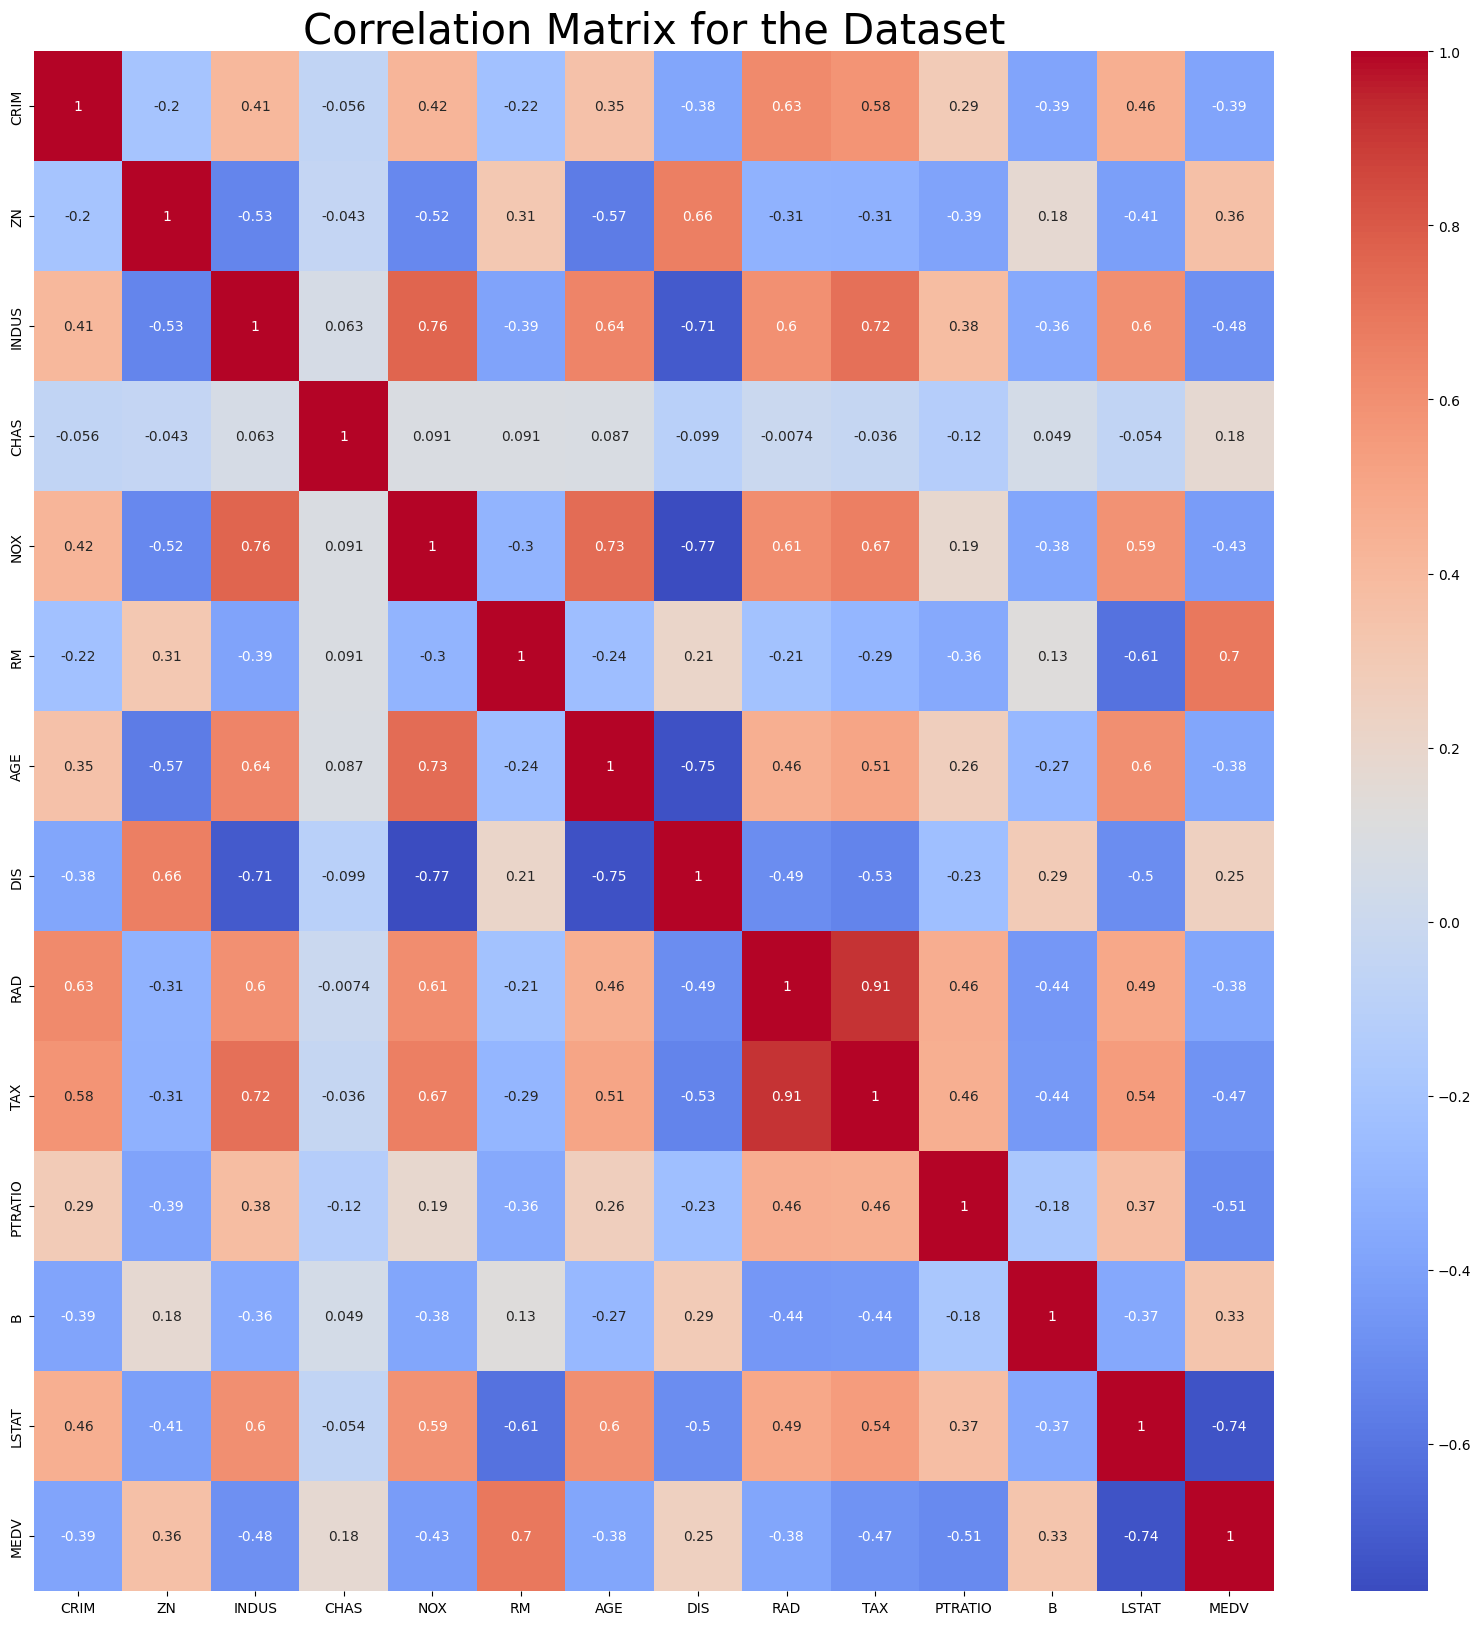

In [ ]:
# Checking for highly inter-correlated and less-correlated features to the target column from the dataset

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for the Dataset",fontsize=30)
plt.show()

# None such feature found

In [ ]:
# Splitting the dataset into feature matrix and the target column

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Applying the MinMaxScaler on the dataset for uniform scaling of the dataset feature values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
# Transformed feature dataframe with all values scaled between 0 and 1

display_cols = col_names[:-1]
pd.DataFrame(X,columns=display_cols).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model Training using various Regressor models and their evaluation

analysis_data = []

m1 = KNeighborsRegressor()
m2 = RandomForestRegressor()
m3 = XGBRegressor()
m4 = LinearRegression()
m5 = SVR()

models = {
    'KNN Regressor' : m1,
    'Random Forest Regressor' : m2,
    'XG Boost Regressor' : m3,
    'Linear Regression' : m4,
    'Support Vector Regressor': m5
}

for model_name in models:
  model = models[model_name]
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  mse = round(mean_squared_error(y_test, pred),2)
  r2 = round(r2_score(y_test, pred)*100,2)
  analysis_data.append([model_name,mse,r2])

In [16]:
# Evaluation Results

display(pd.DataFrame(list(sorted(analysis_data,key = lambda x: x[1])),columns=["Model","MSE","R2-Score(%)"]))

,Model,MSE,R2-Score(%)
0,XG Boost Regressor,6.91,90.58
1,Random Forest Regressor,8.66,88.19
2,KNN Regressor,21.65,70.48
3,Linear Regression,24.29,66.88
4,Support Vector Regressor,28.16,61.60


In [18]:
# Testing the best model on a sample input using the best model found using evaluation results (XG Boost Regressor)

sample_data = np.array([[0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.9, 4.98]])
sample_data = scaler.transform(sample_data)
predicted_price = m3.predict(sample_data)
print(f'Predicted Median House Price : {predicted_price[0] :.2f}')

Predicted Median House Price : 25.87


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Conclusion**

Hence, we have found XG Boost Regressor model to be the best for the use-case with 90.58 % R2-Score.